# ***FAKE AND REAL NEWS DETECTION***

# **Import librarys**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from wordcloud import WordCloud

In [3]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D, Activation, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# **Exploring fake news data**


In [4]:

fake=pd.read_csv('https://raw.githubusercontent.com/ghanshyam001/fake-and-real-news-dataset/main/Fake.csv')


In [5]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
fake.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [7]:
fake ['subject'].value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

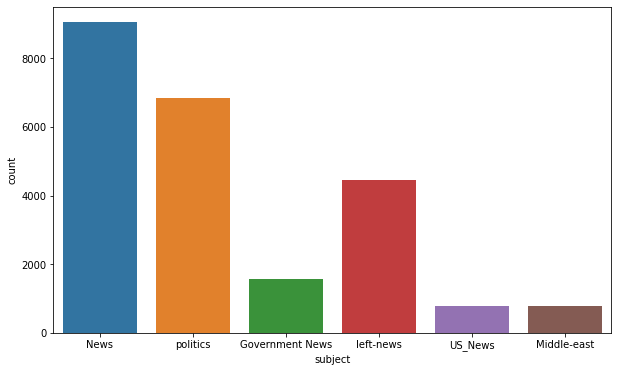

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(x='subject', data=fake)

In [9]:
text=''.join(fake['text'].tolist())

In [10]:
' '.join(['this', 'is', 'a', 'data'])

'this is a data'

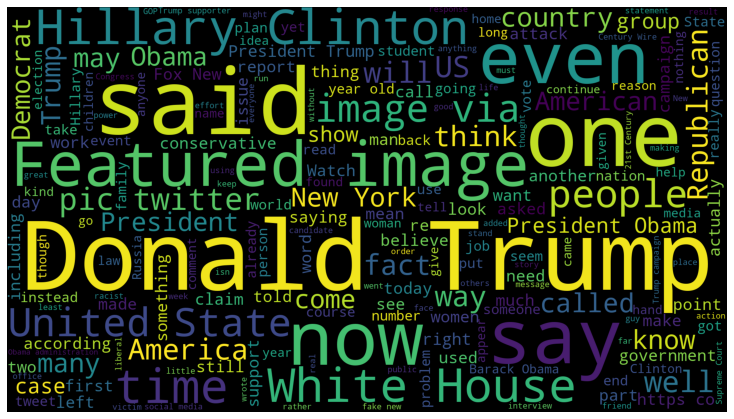

In [11]:
wordcloud = WordCloud(width=1920, height=1080).generate(text)
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## **Exploring Real news data**

In [12]:
real=pd.read_csv('https://raw.githubusercontent.com/ghanshyam001/fake-and-real-news-dataset/main/True.csv')

In [13]:
text=''.join(real['text'].tolist())

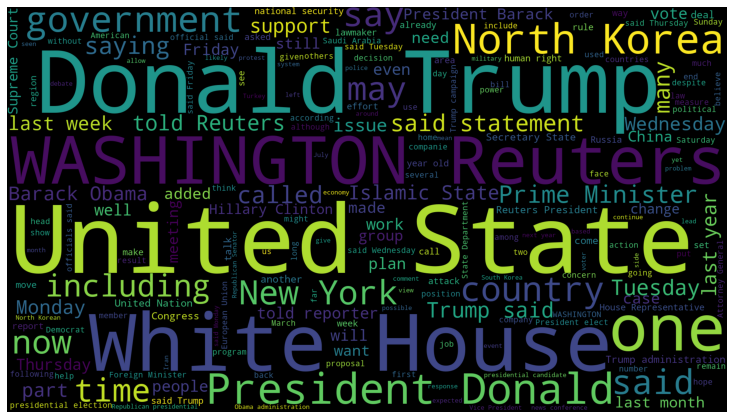

In [14]:
wordcloud = WordCloud(width=1920, height=1080).generate(text)
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Cleaning of  Data

In [15]:
real.sample(5)

,title,text,subject,date
19726,Britain says Syrian reconstruction only after ...,"NEW YORK (Reuters) - Britain, the United State...",worldnews,"September 18, 2017"
19738,Trump says giving Mideast peace 'an absolute go',NEW YORK (Reuters) - U.S. President Donald Tru...,worldnews,"September 18, 2017"
19819,"Peru's Kuczynski swears in new Cabinet, opposi...",LIMA (Reuters) - Peruvian President Pedro Pabl...,worldnews,"September 17, 2017"
18838,"Facebook, Google, Twitter asked to testify on ...",WASHINGTON (Reuters) - Executives from Faceboo...,worldnews,"September 27, 2017"
1434,Foreign government code reviews 'problematic':...,WASHINGTON (Reuters) - Allowing foreign govern...,politicsNews,"October 3, 2017"


In [16]:
unknown_publishers= []
for index, row in enumerate(real.text.values):
  try:
    record= row.split('-', maxsplit=1)
    record[1]

    assert(len(reocrd[0])<120)
  except: 
    unknown_publishers.append(index)


In [17]:
len(unknown_publishers)

21417

In [18]:
real.iloc[unknown_publishers].text

0        WASHINGTON (Reuters) - The head of a conservat...
1        WASHINGTON (Reuters) - Transgender people will...
2        WASHINGTON (Reuters) - The special counsel inv...
3        WASHINGTON (Reuters) - Trump campaign adviser ...
4        SEATTLE/WASHINGTON (Reuters) - President Donal...
                               ...                        
21412    BRUSSELS (Reuters) - NATO allies on Tuesday we...
21413    LONDON (Reuters) - LexisNexis, a provider of l...
21414    MINSK (Reuters) - In the shadow of disused Sov...
21415    MOSCOW (Reuters) - Vatican Secretary of State ...
21416    JAKARTA (Reuters) - Indonesia will buy 11 Sukh...
Name: text, Length: 21417, dtype: object

In [19]:
len(unknown_publishers)

21417

In [20]:
real.iloc[8970]

title      Graphic: Supreme Court roundup
text                                     
subject                      politicsNews
date                       June 16, 2016 
Name: 8970, dtype: object

In [21]:
real=real.drop(8970, axis=0)

In [22]:
publisher = []
temp_text = []

for index, row in enumerate(real.text.values):
  if index in unknown_publishers:
    temp_text.append(row)
    publisher.append('unknown')

  else:
    record= row.split(' - ', maxsplit=1)
    publisher.append(record[0].strip())
    temp_text.append(record[1].strip())


In [23]:
real['publisher']=publisher
real[text]= temp_text 

In [24]:
real.head()

In [25]:
real.shape

In [26]:
empty_fake_index = [index for index,text in enumerate(fake.text.tolist()) if str(text).strip()==""]

In [27]:
fake.iloc[empty_fake_index]

In [28]:
real['text'] = real['title']+ " " + real['text']
fake['text'] = fake['title']+ " " + fake['text']

In [ ]:
real['text'] = real['text'].apply(lambda x: str(x).lower())
fake['text'] = fake['text'].apply(lambda x: str(x).lower())

# **Preprocessing text**

In [ ]:
real['class'] = 1
fake['class'] = 0

In [ ]:
real.columns

In [ ]:
real = real[['text', 'class']]
fake = fake[['text', 'class']]

In [ ]:
data=real.append(fake, ignore_index=True)

In [ ]:
data.sample(8)

In [ ]:
!pip install spacy==2.2.3
!python -m spacy download en_core_web_sm
!pip install beautifulsoup4==4.9.1
!pip install textblob==0.15.3
!pip install git+https://git@github.com/kgptalkie/preprocess_kgptalkie.git --upgrade --force-reinstall


In [ ]:
import preprocess_kgptalkie as ps

In [ ]:
data['text'].apply(lambda x: ps.remove_special_chars(x))

In [ ]:
ps.remove_special_chars('this ,. @ # is gre@t')

In [ ]:
data.head()

# vectorization

In [ ]:
import gensim

In [ ]:
y= data['class'].values

In [ ]:
X = [d.split() for d in data['text'].tolist()]

In [ ]:
type(X)

In [ ]:
print(X[0])

In [ ]:
DIM = 100
w2v_model = gensim.models.Word2Vec(sentences= X, size=DIM, window=10, min_count=1)


In [ ]:
len(w2v_model.wv.vocab)

In [ ]:
w2v_model.wv['india']

In [ ]:
w2v_model.wv.most_similar('india')


In [ ]:
w2v_model.wv.most_similar('modi')

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

In [ ]:
X = tokenizer.texts_to_sequences(X)

In [ ]:
 tokenizer.word_index

In [ ]:
plt.hist([len(x) for x in X], bins= 7000)
plt.show() 

In [ ]:
nos = np.array([len(x) for x in X])
len(nos[nos>1000])

In [ ]:
maxlen = 1000
X = pad_sequences(X, maxlen=maxlen)

In [ ]:
len(X[101])

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
vocab = tokenizer.word_index

In [ ]:
def get_weight_matrix(model):
  weight_matrix=np.zeros((vocab_size, DIM))

  for word, i in vocab.items():
    weight_matrix[i] = model.wv[word]

    return weight_matrix

In [ ]:
embedding_vectors = get_weight_matrix(w2v_model)


In [ ]:
embedding_vectors.shape

# **Creation of model**

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, output_dim=DIM, weights = [embedding_vectors], input_length=maxlen, trainable=False))
model.add(LSTM(units=32)) and model.add(LSTM(units=64))
model.add(Dropout(0.2))
model.add(Activation('softmax'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

# model.add(Dropout(0.2))
# model.add(Dense(units=output_labels))
# model.add(Activation('softmax'))
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])


In [ ]:
model.summary()

# train model

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X,y)

In [ ]:
model.fit(X_train, y_train, validation_split=0.2, epochs=10)


In [ ]:
y_pred= (model.predict(X_test) >= 0.5).astype(int)

In [ ]:
accuracy_score(y_test, y_pred)


In [ ]:
print(classification_report(y_test, y_pred))

# **detection on real news**

In [ ]:
X_test

In [ ]:
x=['this is a news']
x = tokenizer.texts_to_sequences(x)
pad_sequences(x, maxlen=maxlen)
x = pad_sequences(x, maxlen=maxlen)


In [ ]:
(model.predict(x) >= 0.5).astype(int)

In [ ]:
# https://economictimes.indiatimes.com/news/newsblogs/latest-daily-news-and-updates-december-13/liveblog/88246482.cms
x=['Prime Minister Narendra Modi witnesses Ganga Aarti in Varanasi. Shiv Deepotsav is being celebrated today in the city.']
x = tokenizer.texts_to_sequences(x)
x = pad_sequences(x, maxlen=maxlen)
(model.predict(x) >= 0.5).astype(int)

In [ ]:

x=['Congress appoints Pradesh Election Committee of Punjab. Partys state chief Navjot Singh Sidhu to be the Chairman of the Committee.']
x = tokenizer.texts_to_sequences(x)
x = pad_sequences(x, maxlen=maxlen)
(model.predict(x) >= 0.5).astype(int)